In [1]:
# Cell 1: imports & check cwd
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("cwd:", os.getcwd())


cwd: C:\users\kohin\GitHub\CreditPathAi\notebooks


In [2]:
from pathlib import Path
data_dir = Path("../data")
list(data_dir.glob("**/*.csv"))


[WindowsPath('../data/Loan_default.csv'),
 WindowsPath('../data/loan_sample.csv')]

In [3]:
csv_path = data_dir / "Loan_default.csv"   # e.g. data_dir/"loan_default.csv"
df = pd.read_csv(csv_path)
df.shape


(255347, 18)

In [4]:
display(df.head(5))
print(df.shape)
print(df.columns.tolist())
print("\nData types:\n", df.dtypes)
display(df.describe(include="all").T)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


(255347, 18)
['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']

Data types:
 LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LoanID,255347,255347,I38PQUQS96,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,255347.0,NaN,NaN,NaN,43.498306,14.990258,18.0,31.0,43.0,56.0,69.0
Income,255347.0,NaN,NaN,NaN,82499.304597,38963.013729,15000.0,48825.5,82466.0,116219.0,149999.0
LoanAmount,255347.0,NaN,NaN,NaN,127578.865512,70840.706142,5000.0,66156.0,127556.0,188985.0,249999.0
CreditScore,255347.0,NaN,NaN,NaN,574.264346,158.903867,300.0,437.0,574.0,712.0,849.0
MonthsEmployed,255347.0,NaN,NaN,NaN,59.541976,34.643376,0.0,30.0,60.0,90.0,119.0
NumCreditLines,255347.0,NaN,NaN,NaN,2.501036,1.117018,1.0,2.0,2.0,3.0,4.0
InterestRate,255347.0,NaN,NaN,NaN,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,NaN,NaN,NaN,36.025894,16.96933,12.0,24.0,36.0,48.0,60.0
DTIRatio,255347.0,NaN,NaN,NaN,0.500212,0.230917,0.1,0.3,0.5,0.7,0.9


In [5]:
# missing and duplicate checks
miss = df.isna().sum().sort_values(ascending=False)
dup_count = df.duplicated().sum()
print("Duplicates:", dup_count)
display(miss[miss>0].head(20))   # show only columns with missing values


Duplicates: 0


Series([], dtype: int64)

In [6]:
# replace 'Default' with actual target column name if different
target_col = "Default"    # <-- change if your file uses 'Default' or 'loan_status'
if target_col not in df.columns:
    print("Available columns:", df.columns.tolist())
else:
    print(df[target_col].value_counts(dropna=False))
    (df[target_col].value_counts(normalize=True)*100).round(2)


Default
0    225694
1     29653
Name: count, dtype: int64


In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)


Numeric cols: ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']
Categorical cols: ['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


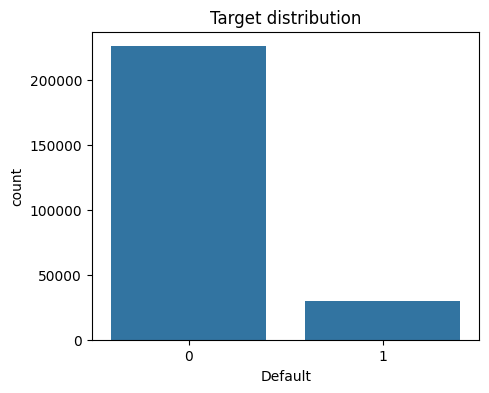

ValueError: Layout of 3x3 must be larger than required size 10

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [8]:
# target bar chart
plt.figure(figsize=(5,4))
sns.countplot(data=df, x=target_col)
plt.title("Target distribution")
plt.show()

# quick histograms for top numeric columns (first 6)
plt.figure(figsize=(12,8))
df[num_cols].hist(bins=30, layout=(3,3), figsize=(12,8))
plt.suptitle("Numeric feature distributions")
plt.show()


In [9]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Loan Default Dataset Profile", explorative=True)
profile.to_file("loan_profile_report.html")


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [27 lines of output]
  Traceback (most recent call last):
    File "C:\Users\kohin\GitHub\CreditPathAi\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
      main()
      ~~~~^^
    File "C:\Users\kohin\GitHub\CreditPathAi\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
      json_out["return_val"] = hook(**hook_input["kwargs"])
                               ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\kohin\GitHub\CreditPathAi\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 143, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\kohin\AppData\Local\Temp\pip-build-env-4r5x8t7l\overlay\Lib\site-packages\setuptools\build_meta.py", line 331, in get_requires_for_build_wheel
      return self

ModuleNotFoundError: No module named 'pandas_profiling'

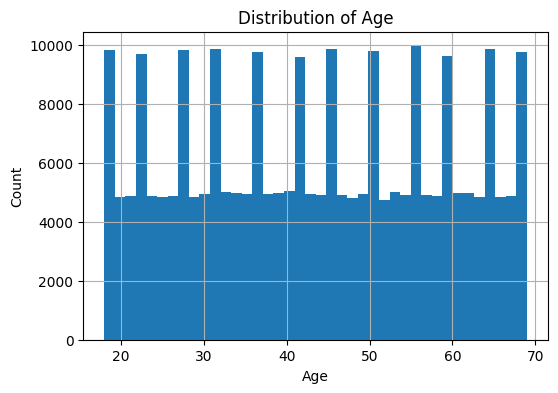

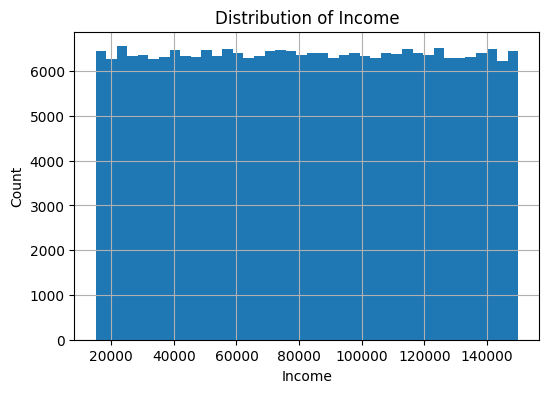

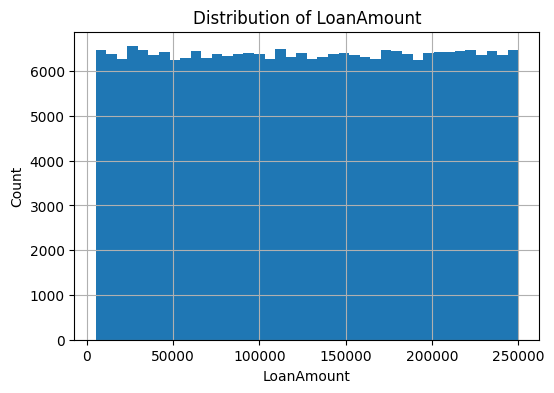

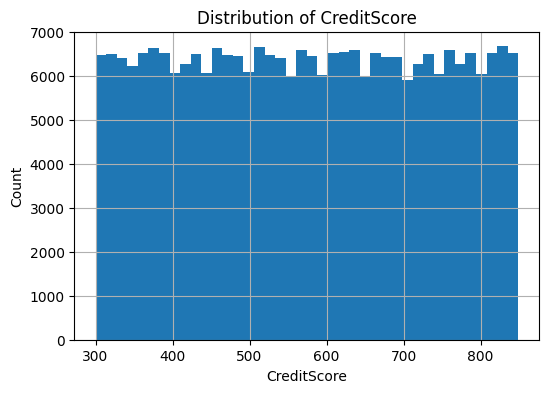

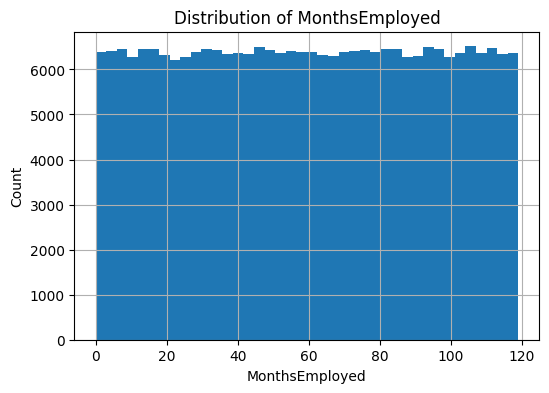

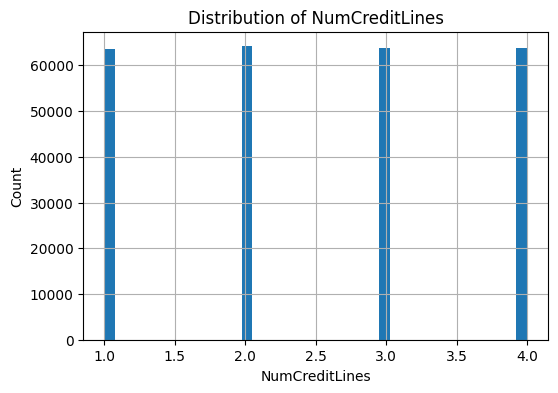

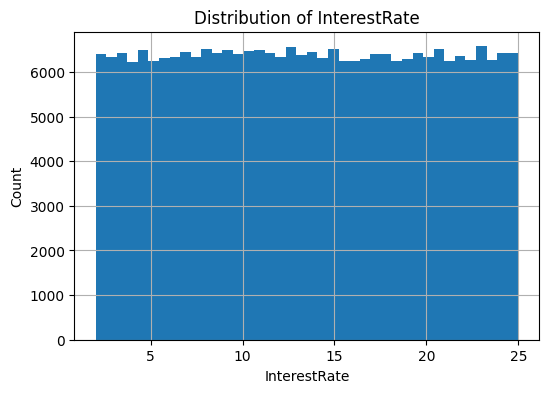

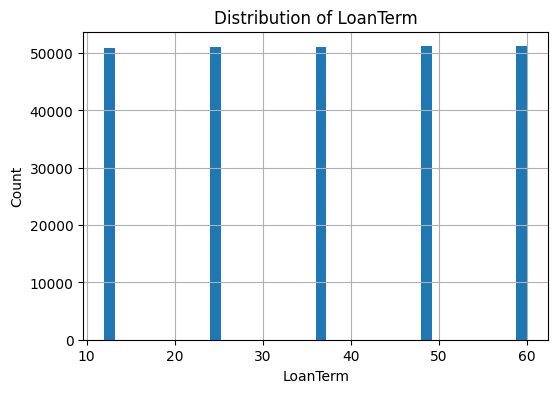

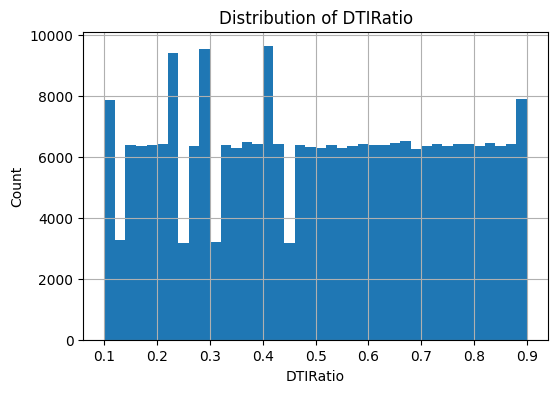

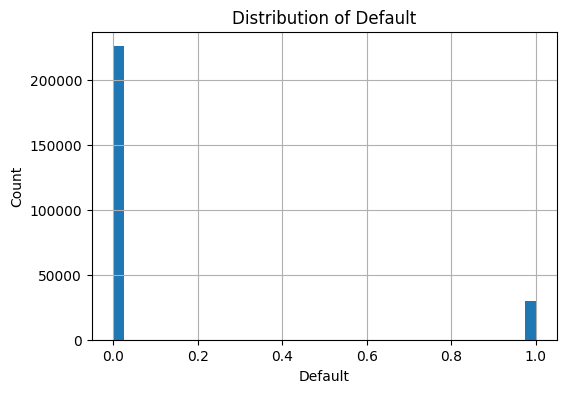

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    df[col].hist(bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


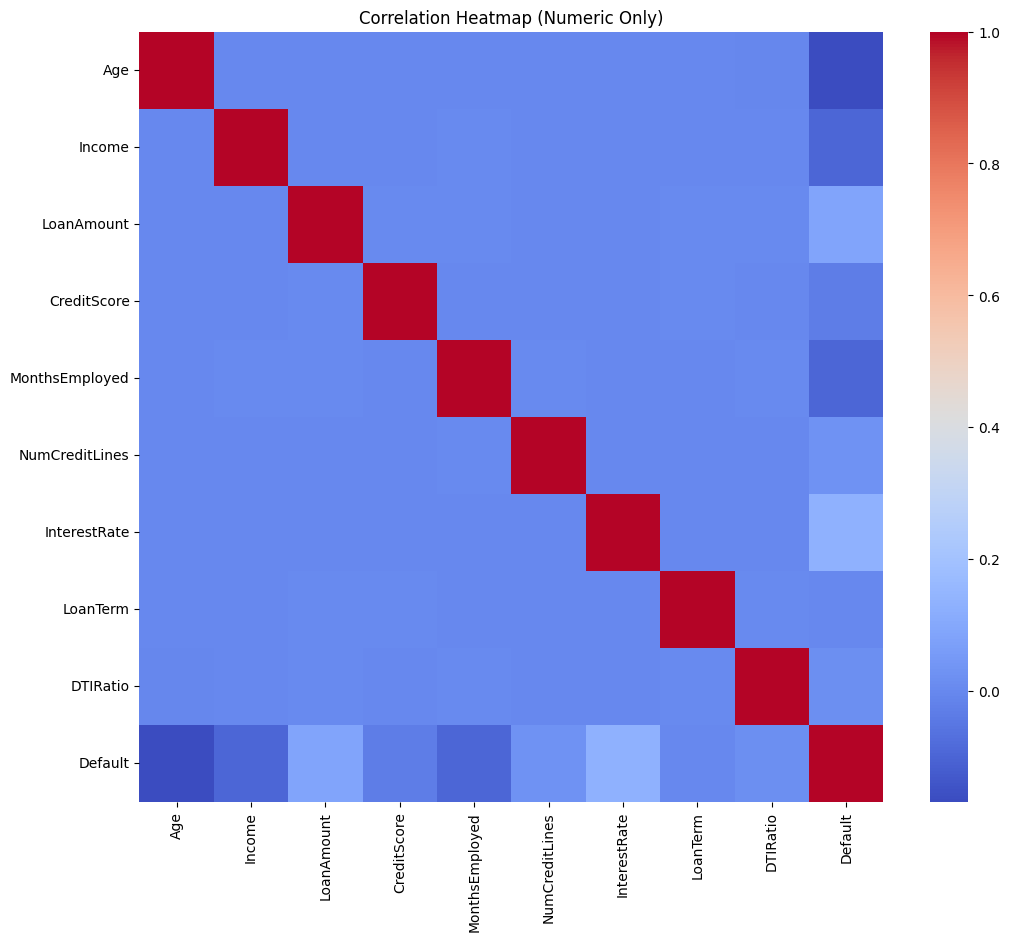

In [11]:
num_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()


In [12]:
# show top categories for first few categorical columns
for c in cat_cols[:6]:
    print("----", c, "----")
    display(df[c].value_counts().head(10))


---- LoanID ----


LoanID
I38PQUQS96    1
HPSK72WA7R    1
C1OZ6DPJ8Y    1
V2KKSFM3UN    1
EY08JDHTZP    1
A9S62RQ7US    1
H8GXPAOS71    1
0HGZQKJ36W    1
1R0N3LGNRJ    1
CM9L1GTT2P    1
Name: count, dtype: int64

---- Education ----


Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

---- EmploymentType ----


EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

---- MaritalStatus ----


MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

---- HasMortgage ----


HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

---- HasDependents ----


HasDependents
Yes    127742
No     127605
Name: count, dtype: int64